##Задача 1

В датасете есть информация о 22514 генах. Судя по описанию, в датасете, который я использую, уже избавились от дубликатов и остались только уникальные значения проб с генами для каждой мыши. В датасете 19 столбцов, первый отвечает за гены, а в остальных 18 данные по пробам у 18 мышей по экспрессии генов после разного количества BPA, добавленного в их пищу.  

In [0]:
# !pip install graphviz
# !pip install pydotplus

In [27]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
df = pd.read_excel('bio.xlsx', skiprows=67)

In [0]:
df = df.drop(22514)

In [115]:
df

,ID_REF,GSM658075,GSM658076,GSM658077,GSM658078,GSM658079,GSM658080,GSM658081,GSM658082,GSM658083,GSM658084,GSM658085,GSM658086,GSM658087,GSM658088,GSM658089,GSM658090,GSM658091,GSM658092,mean_control,mean_low,mean_high
0,A_51_P100034,12.630,11.899,12.393,12.539,12.368,12.361,12.332,12.148,12.032,11.955,12.222,12.202,12.107,12.529,11.838,12.054,12.223,12.343,12.365000,12.148500,12.200937
1,A_51_P100063,5.828,6.598,5.984,5.986,6.089,6.163,6.384,6.410,5.984,6.158,6.031,5.833,6.441,7.814,6.107,7.017,5.853,6.656,6.108000,6.133333,6.516167
2,A_51_P100099,7.638,7.635,7.216,7.767,7.516,7.378,7.171,7.558,7.571,7.607,7.523,7.628,7.461,7.321,7.792,7.577,7.412,7.357,7.525000,7.509667,7.494333
3,A_51_P100155,10.947,10.582,10.406,11.054,10.770,10.402,10.610,10.512,10.492,10.485,10.839,10.535,10.674,10.333,10.622,10.302,10.339,10.572,10.693500,10.578833,10.514292
4,A_51_P100174,6.632,6.089,6.012,6.190,6.260,6.131,5.993,6.274,6.002,6.011,6.124,6.062,6.375,6.087,6.152,6.202,6.209,6.172,6.219000,6.077667,6.186708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22509,A_52_P997209,7.734,8.105,7.841,7.631,7.893,8.232,7.570,8.146,7.550,7.820,7.648,7.675,7.763,8.154,7.703,7.878,8.058,7.989,7.906000,7.734833,7.898229
22510,A_52_P997449,10.070,9.784,9.009,10.071,9.762,9.535,9.876,9.999,10.084,10.064,10.219,10.133,9.428,9.136,9.890,10.302,10.493,9.447,9.705167,10.062500,9.807958
22511,A_52_P99807,8.176,7.628,7.993,7.717,6.355,6.668,6.699,7.256,6.803,8.208,8.409,7.008,6.384,8.434,6.441,6.719,6.401,7.256,7.422833,7.397167,7.056875
22512,A_52_P99848,6.951,7.187,7.154,6.452,7.582,6.585,7.758,6.601,6.838,6.869,7.436,7.073,6.741,8.453,6.870,6.755,7.348,7.659,6.985167,7.095833,7.238375


In [0]:
df.info()

Ниже представлены средние значения экспрессии каждого из генов в трех группах: control, low_dose и high_dose

In [6]:

df['mean_control'] = df.iloc[:,1:7].mean(axis=1)
df['mean_low'] = df.iloc[:,7:13].mean(axis=1)
df['mean_high'] = df.iloc[:,13:].mean(axis=1)
df[['ID_REF', 'mean_control', 'mean_low', 'mean_high']]

,ID_REF,mean_control,mean_low,mean_high
0,A_51_P100034,12.365000,12.148500,12.200937
1,A_51_P100063,6.108000,6.133333,6.516167
2,A_51_P100099,7.525000,7.509667,7.494333
3,A_51_P100155,10.693500,10.578833,10.514292
4,A_51_P100174,6.219000,6.077667,6.186708
...,...,...,...,...
22509,A_52_P997209,7.906000,7.734833,7.898229
22510,A_52_P997449,9.705167,10.062500,9.807958
22511,A_52_P99807,7.422833,7.397167,7.056875
22512,A_52_P99848,6.985167,7.095833,7.238375


Построим деревья решений.

In [119]:
df_tree1 = df.T
df_tree1.columns = df_tree1.iloc[0]
df_tree1 = df_tree1.drop(df_tree1.index[0])
df_tree1 = df_tree1.drop(['mean_control','mean_low','mean_high'])
labels = ['control']*6 + ['low_dose']*6 + ['high_dose']*6
df_tree1.insert(loc=0,column='group',value=labels)
df_tree1

ID_REF,group,A_51_P100034,A_51_P100063,A_51_P100099,A_51_P100155,A_51_P100174,A_51_P100181,A_51_P100227,A_51_P100246,A_51_P100289,A_51_P100327,A_51_P100470,A_51_P100505,A_51_P100565,A_51_P100573,A_51_P100625,A_51_P100787,A_51_P100828,A_51_P100852,A_51_P100856,A_51_P100866,A_51_P100991,A_51_P100997,A_51_P101075,A_51_P101086,A_51_P101137,A_51_P101196,A_51_P101228,A_51_P101255,A_51_P101283,A_51_P101317,A_51_P101347,A_51_P101375,A_51_P101388,A_51_P101425,A_51_P101460,A_51_P101474,A_51_P101506,A_51_P101545,A_51_P101573,...,A_52_P981301,A_52_P98140,A_52_P981587,A_52_P98160,A_52_P981680,A_52_P98210,A_52_P98232,A_52_P98387,A_52_P98452,A_52_P98531,A_52_P98558,A_52_P98625,A_52_P98674,A_52_P987071,A_52_P987411,A_52_P98752,A_52_P987564,A_52_P98778,A_52_P988372,A_52_P988817,A_52_P988932,A_52_P989584,A_52_P989682,A_52_P99082,A_52_P99190,A_52_P99411,A_52_P99430,A_52_P99470,A_52_P99502,A_52_P99531,A_52_P995381,A_52_P996032,A_52_P996473,A_52_P99665,A_52_P99670,A_52_P997209,A_52_P997449,A_52_P99807,A_52_P99848,A_52_P99888
GSM658075,control,12.63,5.828,7.638,10.947,6.632,6.655,8.205,9.787,8.455,7.155,6.011,7.108,8.271,7.277,13.431,10.117,11.52,5.799,13.599,14.409,7.246,6.655,13.133,7.206,6.044,13.22,7.213,13.362,7.097,6.145,6.388,7.246,6.551,6.194,10.599,14.909,7.326,11.927,11.107,...,9.135,7.418,9.722,7.262,11.24,6.223,6.777,13.979,9.341,5.497,8.407,7.432,6.766,10.798,5.799,6.044,8.063,10.907,6.116,6.941,5.828,6.52,9.932,5.998,6.145,13.737,6.932,5.846,7.229,7.974,7.651,8.821,5.901,7.842,7.712,7.734,10.07,8.176,6.951,7.445
GSM658076,control,11.899,6.598,7.635,10.582,6.089,6.788,8.194,9.59,8.218,7.349,5.744,7.498,7.975,7.213,13.827,9.895,11.427,6.343,13.402,14.206,6.836,5.976,13.355,7.397,5.676,13.161,7.384,13.484,8.245,6.365,9.323,7.287,6.23,6.053,10.516,14.725,6.551,12.532,11.348,...,9.996,7.377,9.105,7.462,11.464,6.114,6.824,13.657,9.405,9.343,8.574,7.476,6.765,10.566,6.123,6.079,7.645,10.204,6.456,6.589,6.089,6.402,9.792,5.83,6.039,14.003,6.955,6.031,7.822,7.802,7.246,8.74,6.098,8.468,7.174,8.105,9.784,7.628,7.187,6.946
GSM658077,control,12.393,5.984,7.216,10.406,6.012,6.584,8.335,9.846,8.639,7.26,5.855,7.327,7.912,7.105,13.768,9.905,11.067,6.062,13.761,14.3,6.954,5.947,13.218,7.056,6.079,13.232,6.996,13.564,7.064,6.469,8.73,7.196,6.306,6.002,10.599,14.62,6.731,12.658,11.263,...,9.565,7.411,9.255,7.448,11.441,6.179,6.873,13.779,9.578,9.515,8.707,7.279,6.629,10.533,6.002,5.913,7.73,10.623,6.235,6.731,6.142,6.553,9.821,5.913,6.235,13.668,7.171,6.093,7.739,7.721,7.24,8.799,6.142,8.023,7.613,7.841,9.009,7.993,7.154,7.34
GSM658078,control,12.539,5.986,7.767,11.054,6.19,6.822,8.146,9.733,8.55,6.955,5.782,7.21,8.143,7.277,13.412,10.099,11.562,5.738,13.361,14.399,6.602,6.357,13.292,7.598,6.139,13.162,7.359,13.483,6.47,6.492,6.955,7.185,6.412,5.738,10.211,14.458,6.774,12.019,11.201,...,8.773,7.2,8.834,7.42,11.193,6.343,6.849,14.086,9.187,9.497,8.696,7.513,6.84,10.771,6.098,6.026,8.058,11.063,6.434,6.492,6.239,6.331,9.72,5.921,6.139,13.575,6.583,5.824,7.598,8.294,7.352,8.063,6.114,7.959,7.846,7.631,10.071,7.717,6.452,7.277
GSM658079,control,12.368,6.089,7.516,10.77,6.26,6.742,8.153,9.027,8.273,7.379,5.738,6.731,7.775,7.033,13.741,10.239,11.726,5.93,13.486,14.163,7.168,6.39,13.202,7.197,6.158,13.225,7.245,13.376,8.153,6.39,8.057,7.462,6.181,5.809,10.437,14.846,6.85,12.718,11.053,...,9.623,7.154,8.914,7.696,11.31,5.914,6.782,14.024,9.404,9.353,8.647,7.441,6.742,10.691,5.941,6.05,7.893,10.783,6.103,6.483,5.868,6.237,9.726,5.972,6.172,13.872,7.025,6.003,7.696,8.085,7.582,8.553,5.856,8.037,8,7.893,9.762,6.355,7.582,7.379
GSM658080,control,12.361,6.163,7.378,10.402,6.131,6.782,8.252,9.852,8.413,7.847,6.505,6.982,7.993,7.264,13.794,10.042,11.155,6.359,13.409,14.403,6.873,6.731,12.978,7.166,5.868,12.963,6.992,13.327,6.174,6.601,7.515,7.23,6.913,6.585,10.164,14.664,7.356,13.178,11.52,...,9.805,7.386,9.551,7.496,11.522,6.174,6.792,13.608,9.4,9.7,8.615,7.417,6.632,10.645,5.72,5.868,7.513,10.147,6.318,6.937,5.894,6.339,9.86,6.163,5.789,13.947,6.392,5.963,7.672,7.9

In [0]:
Y_clow = df_tree1.iloc[:12,0]
X_clow = df_tree1.iloc[:12,1:]
Y_chigh = df_tree1.iloc[:6,0].append(df_tree1.iloc[12:,0])
X_chigh = df_tree1.iloc[:6,1:].append(df_tree1.iloc[12:,1:])

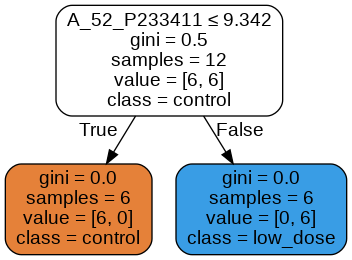

In [129]:
#Control vs low dose
tree_clow = DecisionTreeClassifier(random_state=70,max_depth=2)
tree_clow.fit(X_clow,Y_clow)
cl_names2 = ['control', 'low_dose']
feat_names2 = X_clow.columns
dot_data = StringIO()
export_graphviz(tree_clow, out_file=dot_data, class_names=cl_names2, feature_names=feat_names2,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



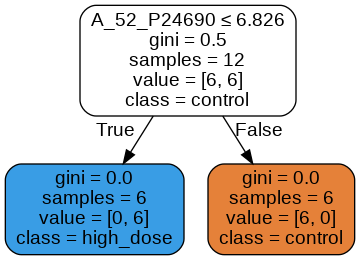

In [130]:
#Control vs high dose
tree_chigh = DecisionTreeClassifier(random_state=70,max_depth=2)
tree_chigh.fit(X_chigh,Y_chigh)
cl_names3 = ['control', 'high_dose']
feat_names3 = X_chigh.columns
dot_data = StringIO()
export_graphviz(tree_chigh, out_file=dot_data, class_names=cl_names3, feature_names=feat_names3,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Получаются только древья глубины 1 (stumps), генами, ставшими лучшими признаками для разбиения, оказались гены в пробах A_52_P233411 и A_52_P24690, они разные для классификаторов. 